In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

In [10]:
df=pd.read_csv('/zoo2.csv')
df2=pd.read_csv('/zoo2.csv')

df.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [11]:
df2.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [12]:
print("Shape of data1", df.shape)
print("Shape of data2",df2.shape)

Shape of data1 (43, 18)
Shape of data2 (43, 18)


In [13]:
df3=pd.concat([df, df2], ignore_index=True)

In [14]:
df3.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [15]:
df3.shape

(86, 18)

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  86 non-null     object
 1   hair         86 non-null     int64 
 2   feathers     86 non-null     int64 
 3   eggs         86 non-null     int64 
 4   milk         86 non-null     int64 
 5   airborne     86 non-null     int64 
 6   aquatic      86 non-null     int64 
 7   predator     86 non-null     int64 
 8   toothed      86 non-null     int64 
 9   backbone     86 non-null     int64 
 10  breathes     86 non-null     int64 
 11  venomous     86 non-null     int64 
 12  fins         86 non-null     int64 
 13  legs         86 non-null     int64 
 14  tail         86 non-null     int64 
 15  domestic     86 non-null     int64 
 16  catsize      86 non-null     int64 
 17  class_type   86 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 12.2+ KB


In [17]:
df3.describe().style.background_gradient(cmap = "magma")

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.023256,0.000000,1.000000,0.000000,0.162791,0.465116,0.302326,0.441860,0.581395,0.767442,0.116279,0.162791,3.209302,0.488372,0.116279,0.372093,4.837209
std,0.151599,0.000000,0.000000,0.000000,0.371340,0.501707,0.461959,0.499521,0.496224,0.424941,0.322439,0.371340,2.571867,0.502797,0.322439,0.486198,1.454085
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,6.000000
max,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
df3.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

3    24
6    24
4    14
5    12
7    12
Name: class_type, dtype: int64


<ipython-input-19-702c9a31e86a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'The Distribution of Classes')

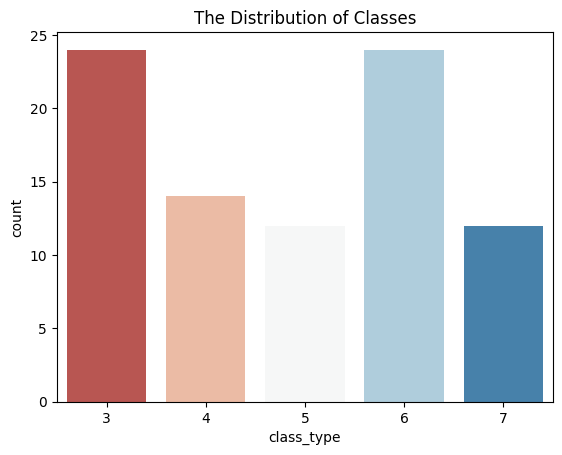

In [19]:
print(df3['class_type'].value_counts())
sns.countplot(data = df3, x = "class_type", palette = "RdBu")
plt.title("The Distribution of Classes")

<ipython-input-20-9cad160c354a>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




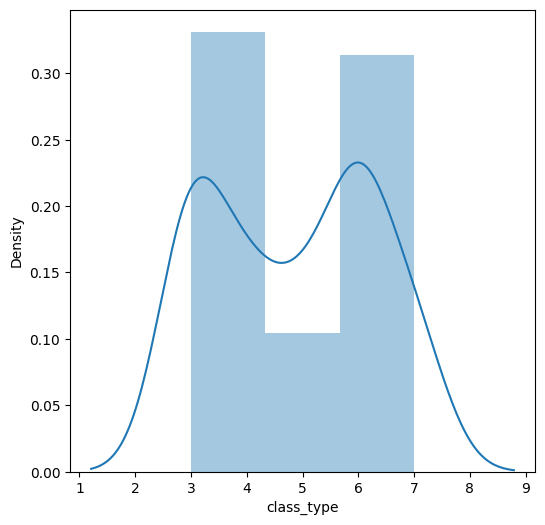

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df3['class_type'])
plt.show()

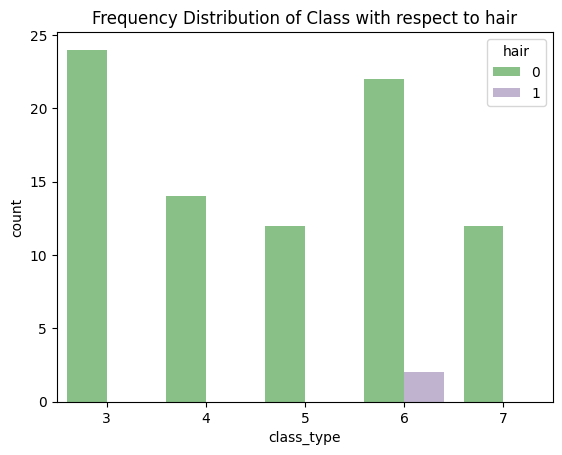

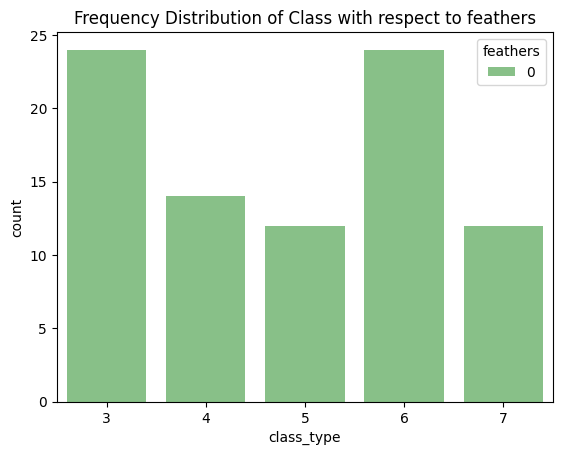

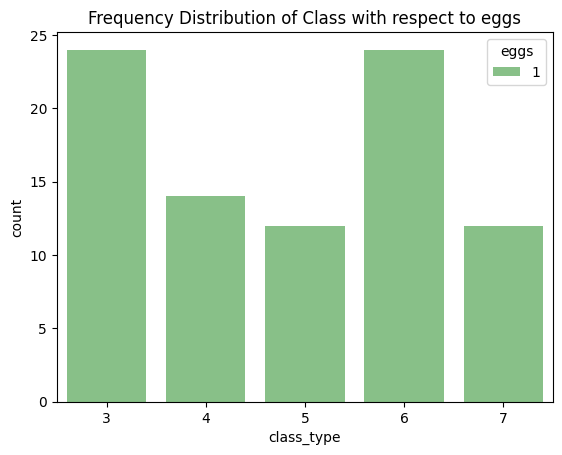

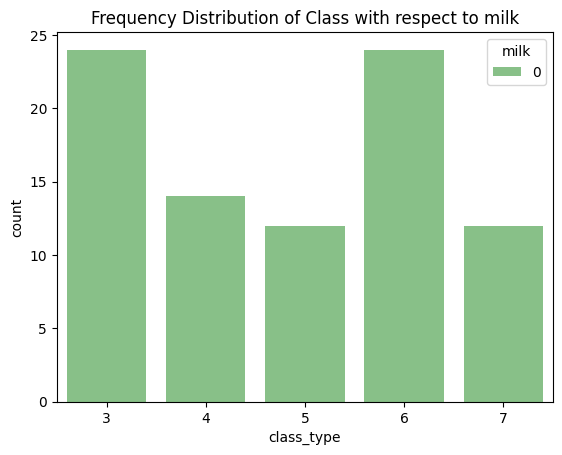

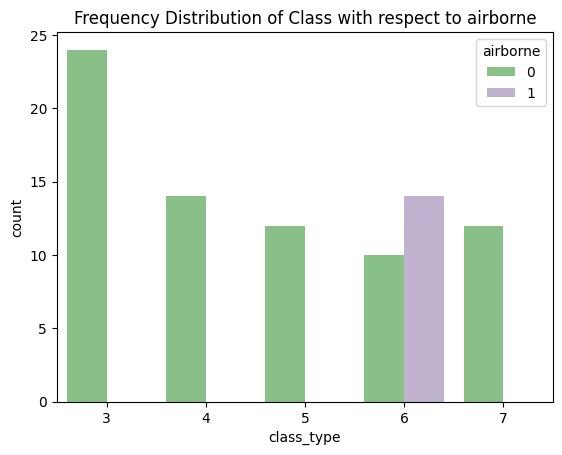

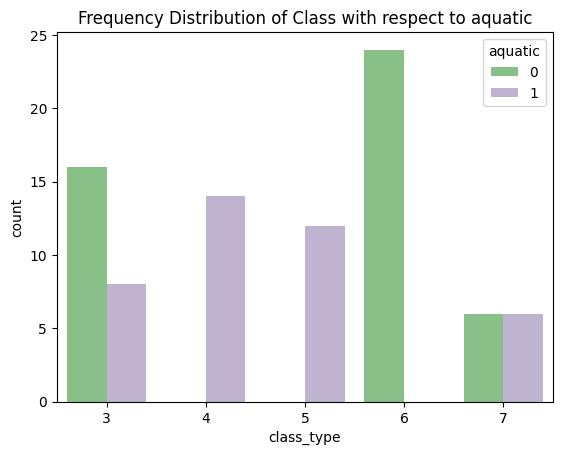

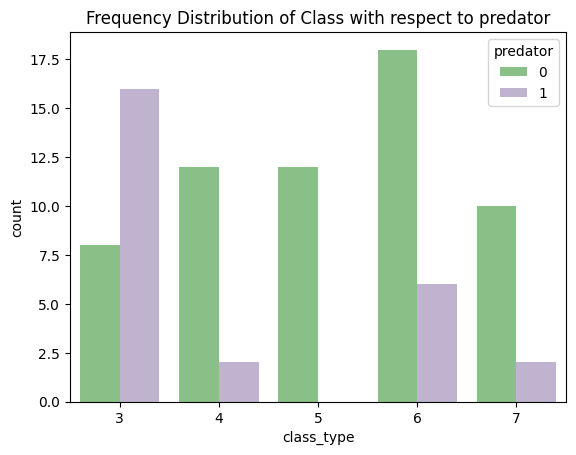

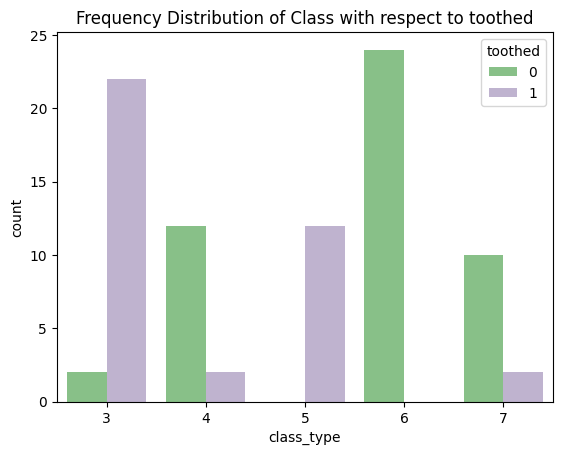

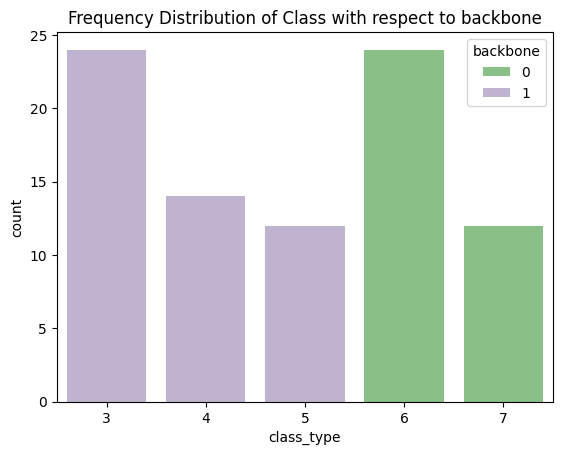

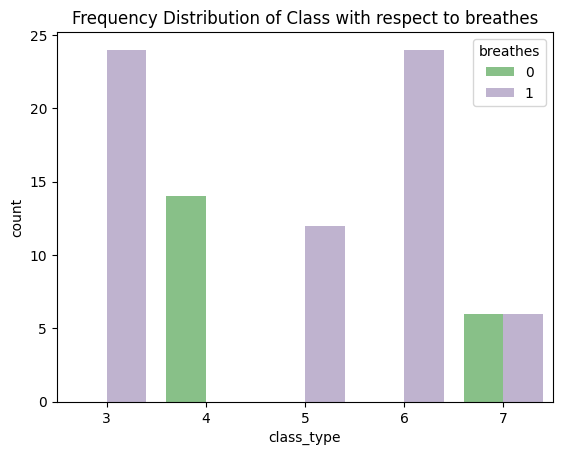

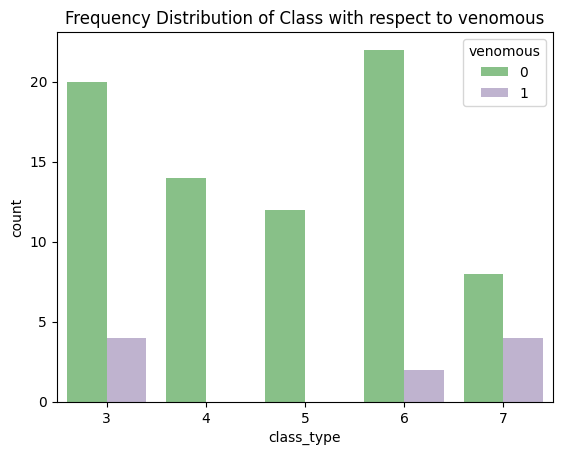

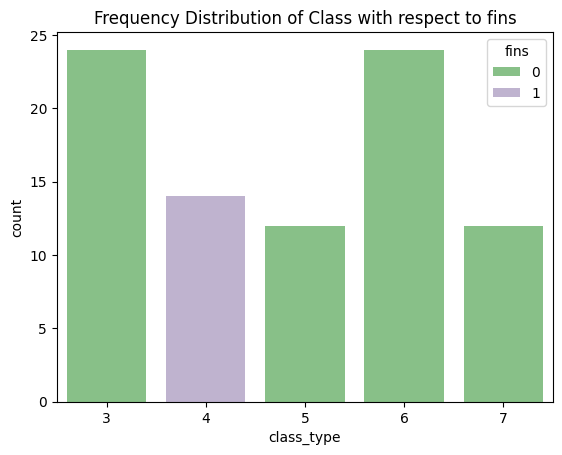

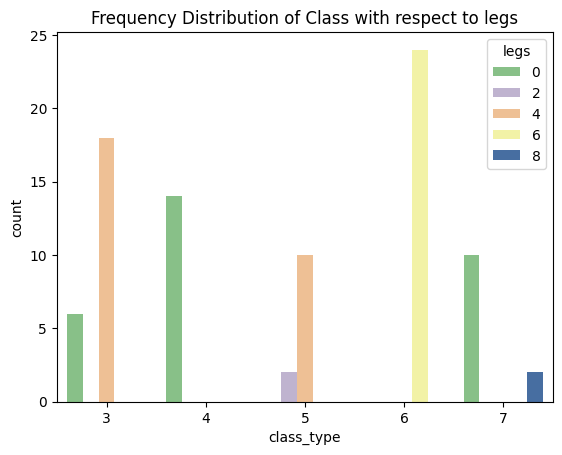

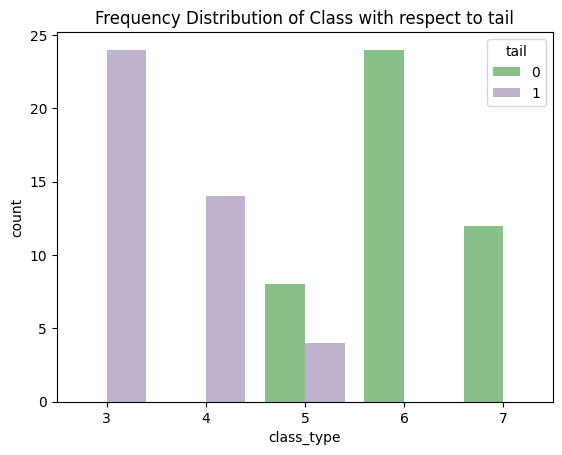

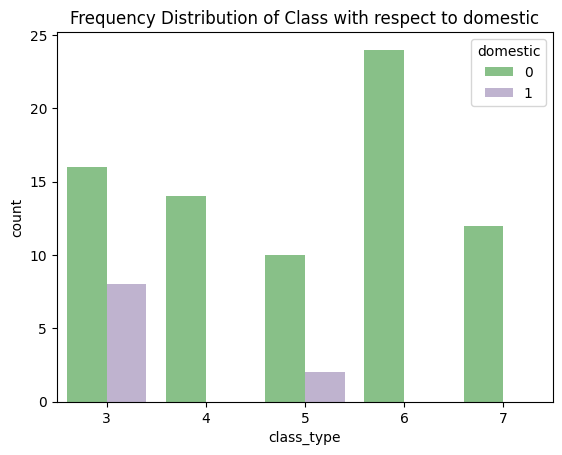

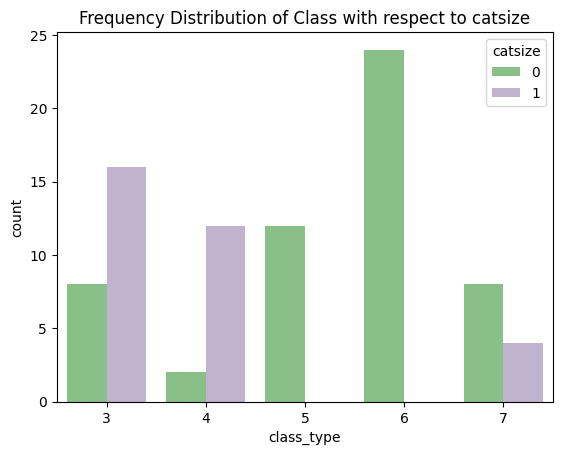

In [21]:
for i in ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']:
    sns.countplot(data = df3, x = "class_type", hue = i, palette = "Accent")
    plt.title(f"Frequency Distribution of Class with respect to {i}")
    plt.show()

In [22]:
df3.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [23]:
px.scatter(df3, x="domestic", y="hair", color="animal_name")